## Exploring eBay Car Sales Data

This is the first project of [DCA0305 - Machine Learning Based Systems Design](https://github.com/ivanovitchm/mlops#dca0305---machine-learning-based-systems-design) class and the guided project of "Practice data cleaning and data exploration using pandas" module of [Dataquest](https://dataquest.io)
<br>
In this project I will work with the eBay Kleinanzeigen used cars dataset, I'm using a modified version of this dataset provided by Dataquest.<br>
You can find the unmodified dataset in this [link](https://data.world/data-society/used-cars-data)
<br>
The aim of this project is to clean and analyze the data of the used cars, trying to extract some useful information and applying the concepts learned during the course.
<br>
Let's get started!

### Imports

In [79]:
import pandas as pd
import numpy as np

### Reading the csv file using pandas

In [80]:
autos = pd.read_csv('autos.csv', encoding='latin-1')

In [81]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [82]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Talk about null values and data types

### Changing column names from camelCase to snake_case

In [83]:
import re
pattern = re.compile(r'(?<!^)(?=[A-Z])')
autos.rename({'yearOfRegistration':'registration_year',
              'monthOfRegistration':'registration_month',
              'notRepairedDamage':'unrepaired_damage',
              'dateCreated':'ad_created',
              'powerPS':'power_ps'}, axis=1, inplace=True)

autos.columns = [pattern.sub('_', col).lower() for col in autos.columns]

print(autos.columns)

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')


Explain why I did this

### Basic Data Exploration

In [84]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [85]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


#### Columns that have mostly one value
* seller
* offer_type
#### Columns that need investigation
* registration_year -> min value is less than the year of creation of the first car, max value is higher than 2016
* power_ps -> max value is very high
* registration_month -> min values starts in 0, but min value available for months is 1
* nr_of_pictures -> all values are 0
#### Numeric columns that are stored as text
* price
* odometer

In [86]:
autos.drop(['seller', 'offer_type', 'nr_of_pictures'], axis=1, inplace=True)

In the cell above I dropped the seller, offer_type, and nr_of_pictures columns because they don't bring any useful information of our data

### Changing type of numerical columns that are stores as text

In [87]:
autos.price = autos.price.str.replace('$','').str.replace(',','').astype(np.float64)
autos.odometer = autos.odometer.str.replace('km','').str.replace(',','').astype(np.float64)
autos.rename({'odometer':'odometer_km'}, axis=1, inplace=True)
autos.head()

/tmp/ipykernel_9288/2253903876.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  autos.price = autos.price.str.replace('$','').str.replace(',','').astype(np.float64)


,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


### Exploring odometer_km and price columns

In [88]:
# For odometer_km
print("Unique values for odometer_km",autos.odometer_km.unique().shape)
autos.odometer_km.describe()


Unique values for odometer_km (13,)


count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [89]:
autos.odometer_km.value_counts()

150000.0    32424
125000.0     5170
100000.0     2169
90000.0      1757
80000.0      1436
70000.0      1230
60000.0      1164
50000.0      1027
5000.0        967
40000.0       819
30000.0       789
20000.0       784
10000.0       264
Name: odometer_km, dtype: int64

In [90]:
autos.odometer_km.value_counts().sort_index().head(8)

5000.0      967
10000.0     264
20000.0     784
30000.0     789
40000.0     819
50000.0    1027
60000.0    1164
70000.0    1230
Name: odometer_km, dtype: int64

In [91]:
print("Unique values for price",autos.price.unique().shape)
autos.price.describe()

Unique values for price (2357,)


count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [92]:
autos.price.value_counts().head(10)

0.0       1421
500.0      781
1500.0     734
2500.0     643
1000.0     639
1200.0     639
600.0      531
800.0      498
3500.0     498
2000.0     460
Name: price, dtype: int64

In [93]:
autos.price.value_counts().sort_index(ascending=False).head(10)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
Name: price, dtype: int64

In [94]:
autos = autos[autos.price.between(autos.price.quantile(0.03), autos.price.quantile(0.999))]
autos.price.describe()

count     48529.000000
mean       5761.707247
std        7554.647099
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7450.000000
max      105000.000000
Name: price, dtype: float64

Explain why I removed this values

### Looking at date columns

<AxesSubplot:>

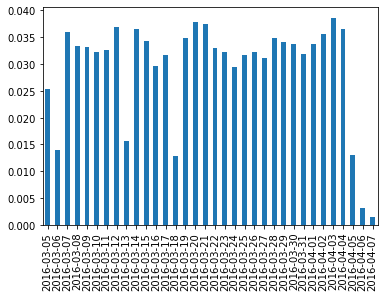

In [95]:
autos.date_crawled.str[:10].value_counts(normalize=True, dropna=False).sort_index().plot(kind='bar')

In [96]:
autos.ad_created.str[:10].value_counts(normalize=True, dropna=False)#.sort_index()#.plot(kind='bar')

2016-04-03    0.038843
2016-03-20    0.037957
2016-03-21    0.037565
2016-04-04    0.036885
2016-03-12    0.036762
                ...   
2016-02-01    0.000021
2016-01-22    0.000021
2016-01-29    0.000021
2015-11-10    0.000021
2016-02-16    0.000021
Name: ad_created, Length: 76, dtype: float64

<AxesSubplot:>

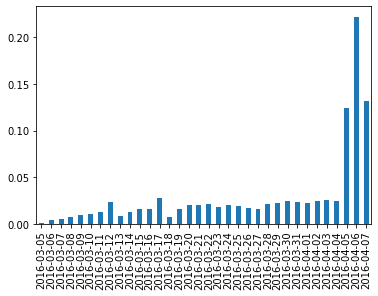

In [97]:
autos.last_seen.str[:10].value_counts(normalize=True, dropna=False).sort_index().plot(kind='bar')

In [98]:
autos.registration_year.describe()

count    48529.000000
mean      2004.754827
std         88.675902
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

Some comments about min and max values

#### Adjusting registration_year columns

In [99]:
autos.registration_year.value_counts().sort_index().head()

1000    1
1001    1
1111    1
1800    2
1910    5
Name: registration_year, dtype: int64

In [100]:
autos.registration_year.value_counts().sort_index().tail(15)

2015     388
2016    1214
2017    1392
2018     470
2019       2
2800       1
4100       1
4500       1
4800       1
5000       4
5911       1
6200       1
8888       1
9000       1
9999       3
Name: registration_year, dtype: int64

In [101]:
autos = autos[autos.registration_year.between(1900,2016)]

<AxesSubplot:>

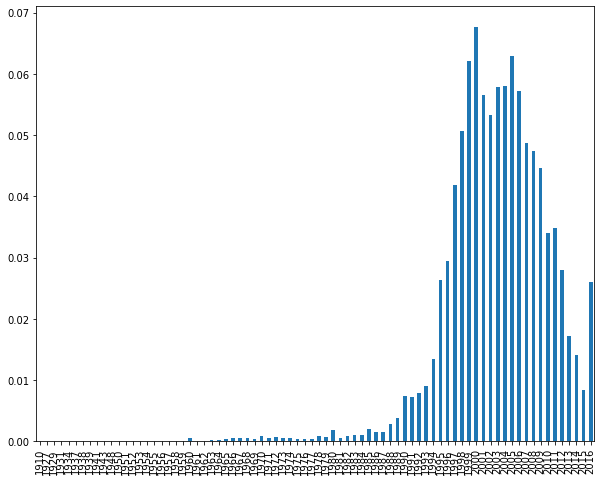

In [102]:
autos.registration_year.value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(10,8))

Talk about the registration year distribution

In [103]:
top20_brands = autos.brand.value_counts().head(20)

Here I choose to look at the top 20 brands, by this point I will start to look at the mean price and the mean km for these brands

In [104]:
mean_price_top20_brands = {}
for brand in top20_brands.index:
    mean_price_top20_brands[brand] = autos[autos.brand == brand].price.mean()

print(mean_price_top20_brands)

{'volkswagen': 5402.410261610221, 'bmw': 8201.538566419946, 'opel': 2975.2419354838707, 'mercedes_benz': 8529.758444444444, 'audi': 9295.681683168317, 'ford': 3710.766094420601, 'renault': 2474.8646069968195, 'peugeot': 3094.0172290021537, 'fiat': 2813.748538011696, 'seat': 4397.230949589683, 'skoda': 6368.0, 'nissan': 4743.40252454418, 'mazda': 4112.596614950635, 'smart': 3580.2239031770046, 'citroen': 3779.1391437308866, 'toyota': 5167.091062394604, 'hyundai': 5365.254273504273, 'sonstige_autos': 10765.764317180618, 'volvo': 4946.501170960188, 'mini': 10613.459657701711}


There are brands with a higher mean price like bmw, mercedes benz, mini, audi, etc. Other with lower mean prices like fiat, renault, opel, etc.
And some with mean prices in between like nissan, volkswagen, toyota, etc.

In [105]:
autos.groupby('brand')['price'].mean().sort_values(ascending=False).head(20)

brand
porsche           33989.687023
land_rover        19108.091837
jeep              11650.500000
jaguar            11635.493151
sonstige_autos    10765.764317
mini              10613.459658
audi               9295.681683
mercedes_benz      8529.758444
bmw                8201.538566
chevrolet          6684.139098
skoda              6368.000000
kia                5982.330303
dacia              5915.528455
volkswagen         5402.410262
hyundai            5365.254274
toyota             5167.091062
volvo              4946.501171
nissan             4743.402525
seat               4397.230950
mazda              4112.596615
Name: price, dtype: float64

Now let's do the same for mean km, and combine the mean price and mean km for the top 20 brands in a new DataFrame to make the analysis easier.

In [106]:
mean_km_top20_brands = {}
for brand in top20_brands.index:
    mean_km_top20_brands[brand] = autos[autos.brand == brand].odometer_km.mean()

print(mean_km_top20_brands)

{'volkswagen': 128707.15879132022, 'bmw': 132633.4242306194, 'opel': 129310.0358422939, 'mercedes_benz': 130851.11111111111, 'audi': 129188.11881188118, 'ford': 124288.77988963826, 'renault': 128071.33121308497, 'peugeot': 127153.62526920316, 'fiat': 117121.9715956558, 'seat': 121131.30128956624, 'skoda': 110848.5639686684, 'nissan': 118330.99579242637, 'mazda': 124464.03385049365, 'smart': 99326.77760968229, 'citroen': 119694.18960244648, 'toyota': 115944.35075885328, 'hyundai': 106442.30769230769, 'sonstige_autos': 90616.74008810573, 'volvo': 138067.9156908665, 'mini': 88105.13447432763}


In [107]:
bmp_series = pd.Series(mean_price_top20_brands)
print(bmp_series)

volkswagen         5402.410262
bmw                8201.538566
opel               2975.241935
mercedes_benz      8529.758444
audi               9295.681683
ford               3710.766094
renault            2474.864607
peugeot            3094.017229
fiat               2813.748538
seat               4397.230950
skoda              6368.000000
nissan             4743.402525
mazda              4112.596615
smart              3580.223903
citroen            3779.139144
toyota             5167.091062
hyundai            5365.254274
sonstige_autos    10765.764317
volvo              4946.501171
mini              10613.459658
dtype: float64


In [108]:
df_top_brands = pd.DataFrame(bmp_series, columns=['mean_price'])
df_top_brands['mean_km'] = pd.Series(mean_km_top20_brands)
df_top_brands

,mean_price,mean_km
volkswagen,5402.410262,128707.158791
bmw,8201.538566,132633.424231
opel,2975.241935,129310.035842
mercedes_benz,8529.758444,130851.111111
audi,9295.681683,129188.118812
ford,3710.766094,124288.779890
renault,2474.864607,128071.331213
peugeot,3094.017229,127153.625269
fiat,2813.748538,117121.971596
seat,4397.230950,121131.301290


It's possible to see some slightly kind of pattern, brands with higher mean prices tend to have smaller mean km in comparison with brands with lower mean prices

<AxesSubplot:title={'center':'Mean price vs. mean km (ρ = -0.39)'}, xlabel='mean_price', ylabel='mean_km'>

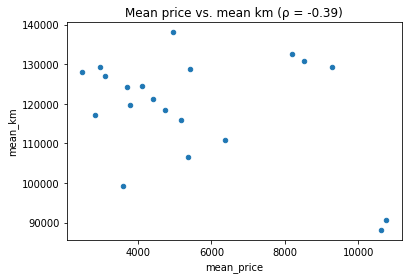

In [118]:
corr = df_top_brands.corr()['mean_price'][1]
df_top_brands.plot(x='mean_price', y='mean_km', kind='scatter', title='Mean price vs. mean km (ρ = {:.2f})'.format(corr))